In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, cv2, colorsys
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76, rgb2hsv

%matplotlib inline

---  
### HELPER FUNCTIONS

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    print(rgb_colors, hex_colors)
    return rgb_colors, hex_colors

In [5]:
def recognize_color(csv, R=0, G=0, B=0):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [6]:
def RGB2HSV(red=40, green=32, blue=28):
    #rgb normal: range (0-255, 0-255, 0.255)
    
    #get rgb percentage: range (0-1, 0-1, 0-1 )
    red_percentage= red / float(255)
    green_percentage= green/ float(255)
    blue_percentage=blue / float(255)

    
    #get hsv percentage: range (0-1, 0-1, 0-1)
    color_hsv_percentage=colorsys.rgb_to_hsv(red_percentage, green_percentage, blue_percentage) 
    print('color_hsv_percentage: ', color_hsv_percentage)

    
    
    #get normal hsv: range (0-360, 0-255, 0-255)
    color_h=round(360*color_hsv_percentage[0])
    color_s=round(255*color_hsv_percentage[1])
    color_v=round(255*color_hsv_percentage[2])
    color_hsv=(color_h, color_s, color_h)

    print('color_hsv: ', color_hsv)
    return color_hsv

In [7]:
def checkBrightness(img, threshold=180):
    """
    checks the overall brightness of an image
    to make sure colors are interpreted correctly

    if brightness is lower than threshold,
    user is prompted to take another image
    """
    print(f"\nchecking image brightness ...")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    values = img[:, :, 2]
    brightness = int(np.mean(values))
    print(f"average brightness of image = {brightness}")

    if brightness < threshold :
        print(f"brightness is too low !\nplease take another picture in better lighting")
    else:
        print(f"great photography skills !")
    
    plt.imshow(values, cmap="gray")

---  
### MAIN

The type of this input is <class 'numpy.ndarray'>
Shape: (2500, 2000, 3)

checking image brightness ...
average brightness of image = 216
brightness is too low !
please take another picture in better lighting


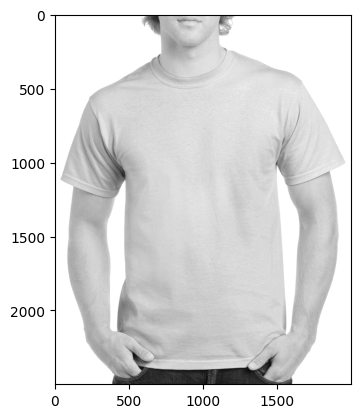

In [8]:
image = cv2.imread('../misc/tshirt.jfif')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('../misc/colors.csv', names=index, header=None)

# CHECK IMAGE BRIGHTNESS
checkBrightness(image, 220)

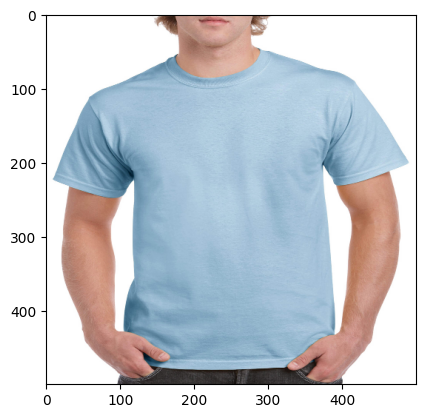

In [9]:
height, width = 500, 500
image = cv2.resize(image, (height, width))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

(200, 200, 3)


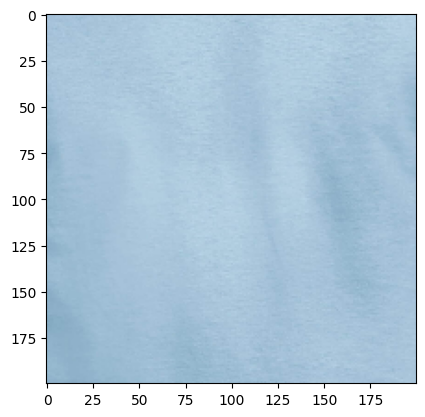

In [10]:
h, w, c = image.shape
margin = 100
window = image[h//2-margin:h//2+margin, w//2-margin:w//2+margin]
print(window.shape)
plt.imshow(window)

c:\MARS\program_setups\anaconda3\envs\GPUtorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([166.6209  , 195.921025, 217.575525])] ['#a6c3d9']


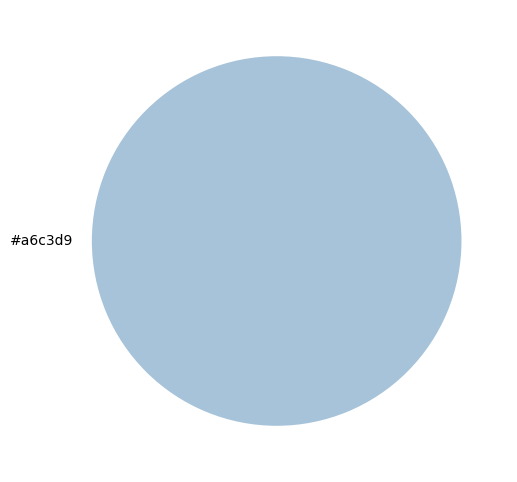

In [11]:
rgb, hex = get_colors(window, 1, True)

In [12]:
print(f"rgb : {rgb, type(rgb)}")
print(f"hex : {hex, type(hex)}")

rgb : ([array([166.6209  , 195.921025, 217.575525])], <class 'list'>)
hex : (['#a6c3d9'], <class 'list'>)


In [13]:
rgb, hex = rgb[0], hex[0]
print(f"rgb : {rgb, type(rgb)}")
print(f"hex : {hex, type(hex)}")

rgb : (array([166.6209  , 195.921025, 217.575525]), <class 'numpy.ndarray'>)
hex : ('#a6c3d9', <class 'str'>)


In [14]:
R, G, B = rgb.astype(int)
print(f"colors : {R, G, B}, type {type(R)}")

colors : (166, 195, 217), type <class 'numpy.int32'>


`sckimage.color.rgb2hsv` this converts whole image not just a number

In [15]:
H, S, V = RGB2HSV(R, G, B)
print(H, S, V)

color_hsv_percentage:  (0.5718954248366014, 0.23502304147465433, 0.8509803921568627)
color_hsv:  (206, 60, 206)
206 60 206


In [16]:
H, S, V = colorsys.rgb_to_hsv(R/255, G/255, B/255)
print(f"hsv : {H, S, V}")
H = round(H*360, 2)
print(f"hue : {H}")

hsv : (0.5718954248366014, 0.23502304147465433, 0.8509803921568627)
hue : 205.88


---  
### COLOR THEORY

`complementary colors` : color that is 180 degrees apart from another color  
`split complimentary colors` : a base color and two colors that are 150 degrees and 210 degrees apart from the base color  
`analogous colors` : main color with the two colors directly next to it on the color wheel  
`triadic colors` : a main color and two colors that are 120 degrees and 240 degrees apart from the main color  
`tetradic colors` : a main color and three colors  that are 90 degrees, 180 degrees, and 270 degrees apart from the main color  